PRETRAINED MODELS

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, cifar10
import tensorflow_hub as hub

# To Avoid GPU errors
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# ================================================ #
#                  Pretrained-Model                #
# ================================================ #

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

def my_model():
    inputs = keras.Input(shape=(32,32,3))
    x = layers.Conv2D(32, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)   
    outputs = layers.Dense(10)(x)
    model = keras.Model(inputs = inputs, outputs = outputs) 
    return model


# SavedModel format or HDF5 format
model = my_model()
# model = keras.models.load_model('saved_model/')
# model.load_weights('checkpoint_folder/')

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)
# model.save_weights('checkpoint_folder/')
model.save("saved_model/")


Epoch 1/2
1563/1563 - 6s - loss: 1.2462 - accuracy: 0.5789
Epoch 2/2
1563/1563 - 5s - loss: 0.8130 - accuracy: 0.7179
313/313 - 1s - loss: 0.9142 - accuracy: 0.6887
INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
model = keras.models.load_model("/content/saved_model")

In [ ]:
print(model.summary())

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
tf.nn.relu_12 (TFOpLambda)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)        256 

In [ ]:
model.trainable = False

In [ ]:
base_inputs = model.layers[0].input
base_outputs = model.layers[-2].output
print(base_inputs)
print(base_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8192), dtype=tf.float32, name=None), name='flatten_4/Reshape:0', description="created by layer 'flatten_4'")


In [ ]:
final_outputs = layers.Dense(10)(base_outputs)
# final_outputs = layers.Dense(15)(base_outputs)
new_model = keras.Model(inputs = base_inputs, outputs = final_outputs)

In [ ]:
print(new_model.summary())

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
tf.nn.relu_12 (TFOpLambda)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)        256

In [ ]:
new_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

new_model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=2)


Epoch 1/3
1563/1563 - 4s - loss: 0.7753 - accuracy: 0.7300
Epoch 2/3
1563/1563 - 4s - loss: 0.5692 - accuracy: 0.8042
Epoch 3/3
1563/1563 - 4s - loss: 0.4857 - accuracy: 0.8340


PRETRAINED KERAS MODELS

In [ ]:
x = tf.random.normal(shape=(5, 299, 299, 3))
y = tf.constant([0,1,2,3,4])

model = keras.applications.InceptionV3(include_top=True)
model.summary()

96116736/96112376 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 149, 149, 32) 96          conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_15[0][0]     
______________________

In [ ]:
base_inputs = model.layers[0].input
base_outputs = model.layers[-2].output
final_outputs = layers.Dense(5)(base_outputs)

new_model = keras.Model(inputs = base_inputs, outputs = final_outputs)
new_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

new_model.fit(x, y, epochs=15, verbose=2)

Epoch 1/15
1/1 - 8s - loss: 1.6357 - accuracy: 0.4000
Epoch 2/15
1/1 - 0s - loss: 0.1968 - accuracy: 1.0000
Epoch 3/15
1/1 - 0s - loss: 6.7898e-04 - accuracy: 1.0000
Epoch 4/15
1/1 - 0s - loss: 1.9359e-04 - accuracy: 1.0000
Epoch 5/15
1/1 - 0s - loss: 1.0089e-04 - accuracy: 1.0000
Epoch 6/15
1/1 - 0s - loss: 6.6014e-05 - accuracy: 1.0000
Epoch 7/15
1/1 - 0s - loss: 5.3165e-05 - accuracy: 1.0000
Epoch 8/15
1/1 - 0s - loss: 4.7181e-05 - accuracy: 1.0000
Epoch 9/15
1/1 - 0s - loss: 4.5798e-05 - accuracy: 1.0000
Epoch 10/15
1/1 - 0s - loss: 4.6084e-05 - accuracy: 1.0000
Epoch 11/15
1/1 - 0s - loss: 4.6609e-05 - accuracy: 1.0000
Epoch 12/15
1/1 - 0s - loss: 4.7205e-05 - accuracy: 1.0000
Epoch 13/15
1/1 - 0s - loss: 4.7801e-05 - accuracy: 1.0000
Epoch 14/15
1/1 - 0s - loss: 4.7777e-05 - accuracy: 1.0000
Epoch 15/15
1/1 - 0s - loss: 4.7514e-05 - accuracy: 1.0000


PRETRAINED TF HUB MODELS

In [ ]:
https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4

In [ ]:
x = tf.random.normal(shape=(5, 299, 299, 3))
y = tf.constant([0,1,2,3,4])

url = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'

base_model = hub.KerasLayer(url, input_shape=(299,299,3))
base_model.trainable=False
model = keras.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5),                      
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(x, y, batch_size=32, epochs=20, verbose=2)


Epoch 1/20
1/1 - 5s - loss: 1.6210 - accuracy: 0.2000
Epoch 2/20
1/1 - 0s - loss: 1.5491 - accuracy: 0.2000
Epoch 3/20
1/1 - 0s - loss: 1.3905 - accuracy: 0.6000
Epoch 4/20
1/1 - 0s - loss: 1.2997 - accuracy: 0.4000
Epoch 5/20
1/1 - 0s - loss: 1.1925 - accuracy: 1.0000
Epoch 6/20
1/1 - 0s - loss: 1.0855 - accuracy: 1.0000
Epoch 7/20
1/1 - 0s - loss: 0.9868 - accuracy: 1.0000
Epoch 8/20
1/1 - 0s - loss: 0.8882 - accuracy: 1.0000
Epoch 9/20
1/1 - 0s - loss: 0.7977 - accuracy: 1.0000
Epoch 10/20
1/1 - 0s - loss: 0.7150 - accuracy: 1.0000
Epoch 11/20
1/1 - 0s - loss: 0.6406 - accuracy: 1.0000
Epoch 12/20
1/1 - 0s - loss: 0.5663 - accuracy: 1.0000
Epoch 13/20
1/1 - 0s - loss: 0.4868 - accuracy: 1.0000
Epoch 14/20
1/1 - 0s - loss: 0.4246 - accuracy: 1.0000
Epoch 15/20
1/1 - 0s - loss: 0.3717 - accuracy: 1.0000
Epoch 16/20
1/1 - 0s - loss: 0.3260 - accuracy: 1.0000
Epoch 17/20
1/1 - 0s - loss: 0.2858 - accuracy: 1.0000
Epoch 18/20
1/1 - 0s - loss: 0.2469 - accuracy: 1.0000
Epoch 19/20
1/1 - 0

TENSORFLOW DATASETS

In [ ]:
import os 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=['train','test'],
    shuffle_files=True,
    as_supervised=False,
    with_info=True,
)

print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



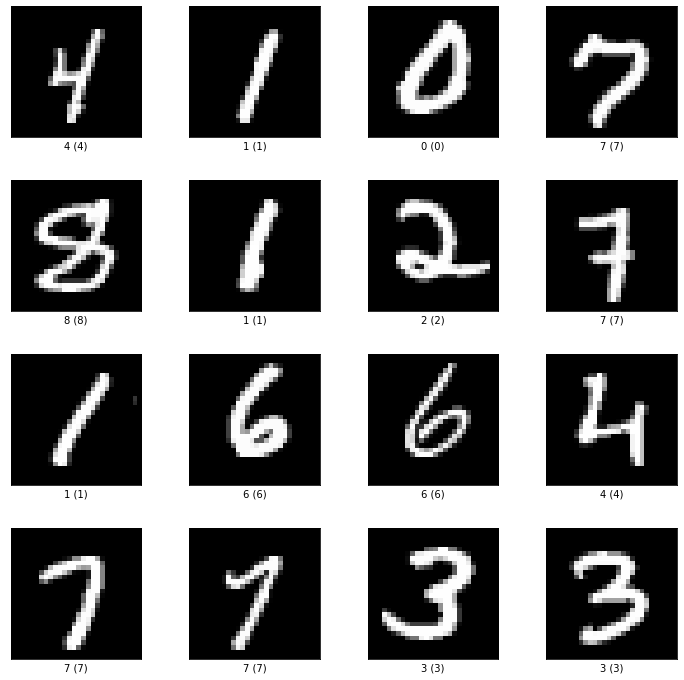

In [ ]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255.0, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64 
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

model = keras.Sequential([
     keras.Input((28,28,1)) ,
     layers.Conv2D(32, 3, activation='relu'),
     layers.Flatten(),
     layers.Dense(10),                    
])

model.compile(
     loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
     optimizer = keras.optimizers.Adam(lr = 0.001),
     metrics = ["accuracy"],          
)

model.fit(ds_train, epochs =10, verbose=2)
model.evaluate(ds_test)

Epoch 1/10
938/938 - 12s - loss: 0.2229 - accuracy: 0.9358
Epoch 2/10
938/938 - 2s - loss: 0.0786 - accuracy: 0.9777
Epoch 3/10
938/938 - 2s - loss: 0.0551 - accuracy: 0.9835
Epoch 4/10
938/938 - 2s - loss: 0.0421 - accuracy: 0.9876
Epoch 5/10
938/938 - 2s - loss: 0.0333 - accuracy: 0.9896
Epoch 6/10
938/938 - 2s - loss: 0.0266 - accuracy: 0.9924
Epoch 7/10
938/938 - 2s - loss: 0.0215 - accuracy: 0.9934
Epoch 8/10
938/938 - 2s - loss: 0.0163 - accuracy: 0.9954
Epoch 9/10
938/938 - 2s - loss: 0.0129 - accuracy: 0.9964
Epoch 10/10
938/938 - 2s - loss: 0.0113 - accuracy: 0.9964
79/79 [==============================] - 1s 12ms/step - loss: 0.0691 - accuracy: 0.9824


[0.06911313533782959, 0.9824000000953674]

TRYING WITH TEXT DATA-IMDB DATASET

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    "imdb_reviews",
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

tokenizer = tfds.deprecated.text.Tokenizer()

def build_vocab():
    vocab = set()
    for text, _ in ds_train:
        vocab.update(tokenizer.tokenize(text.numpy().lower()))
    return vocab

vocab = build_vocab()

encoder = tfds.deprecated.text.TokenTextEncoder(
    vocab, oov_token="<UNK>", lowercase=True, tokenizer=tokenizer
)

def my_enc(text_tensor, label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label


def encode_map_fn(text, label):
    # py_func doesn't set the shape of the returned tensors.
    encoded_text, label = tf.py_function(
        my_enc, inp=[text, label], Tout=(tf.int64, tf.int64)
    )

    # `tf.data.Datasets` work best if all components have a shape set
    #  so set the shapes manually:
    encoded_text.set_shape([None])
    label.set_shape([])

    return encoded_text, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(encode_map_fn, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.padded_batch(32, padded_shapes=([None], ()))
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(encode_map_fn)
ds_test = ds_test.padded_batch(32, padded_shapes=([None], ()))

model = keras.Sequential(
    [
        layers.Masking(mask_value=0),
        layers.Embedding(input_dim=len(vocab) + 2, output_dim=32),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)

model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(3e-4, clipnorm=1),
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=15, verbose=2)
model.evaluate(ds_test)


# def normalize_img(image, label):
#     return tf.cast(image, tf.float32)/255.0, label

# AUTOTUNE = tf.data.experimental.AUTOTUNE
# BATCH_SIZE = 64 
# ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
# ds_train = ds_train.batch(BATCH_SIZE)
# ds_train = ds_train.prefetch(AUTOTUNE)

# ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.prefetch(AUTOTUNE)

# model = keras.Sequential([
#      keras.Input((28,28,1)) ,
#      layers.Conv2D(32, 3, activation='relu'),
#      layers.Flatten(),
#      layers.Dense(10),                    
# ])

# model.compile(
#      loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#      optimizer = keras.optimizers.Adam(lr = 0.001),
#      metrics = ["accuracy"],          
# )

# model.fit(ds_train, epochs =10, verbose=2)
# model.evaluate(ds_test)

Epoch 1/15
782/782 - 27s - loss: 0.6741 - accuracy: 0.5053
Epoch 2/15
782/782 - 14s - loss: 0.4846 - accuracy: 0.7306
Epoch 3/15
782/782 - 14s - loss: 0.3316 - accuracy: 0.8610
Epoch 4/15
782/782 - 14s - loss: 0.2664 - accuracy: 0.8948
Epoch 5/15
782/782 - 14s - loss: 0.2266 - accuracy: 0.9125
Epoch 6/15
782/782 - 14s - loss: 0.1971 - accuracy: 0.9268
Epoch 7/15
782/782 - 14s - loss: 0.1733 - accuracy: 0.9368
Epoch 8/15
782/782 - 14s - loss: 0.1527 - accuracy: 0.9464
Epoch 9/15
782/782 - 14s - loss: 0.1344 - accuracy: 0.9543
Epoch 10/15
782/782 - 14s - loss: 0.1193 - accuracy: 0.9607
Epoch 11/15
782/782 - 14s - loss: 0.1050 - accuracy: 0.9650
Epoch 12/15
782/782 - 14s - loss: 0.0926 - accuracy: 0.9704
Epoch 13/15
782/782 - 14s - loss: 0.0805 - accuracy: 0.9746
Epoch 14/15
782/782 - 14s - loss: 0.0720 - accuracy: 0.9774
Epoch 15/15
782/782 - 14s - loss: 0.0621 - accuracy: 0.9819
782/782 [==============================] - 16s 20ms/step - loss: 0.3560 - accuracy: 0.8803


[0.355975478887558, 0.8803200125694275]

CALLBACKS & CUSTOM CALLBACKS

In [ ]:
import os
import matplotlib.pyplot

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)


def normalize_img(image, label):
    """Normalizes images"""
    return tf.cast(image, tf.float32) / 255.0, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

# Setup for train dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

model = keras.Sequential(
    [
        keras.Input((28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

save_callback = keras.callbacks.ModelCheckpoint(
    "checkpoint/", save_weights_only=True, monitor="accuracy", save_best_only=False,
)

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") > 0.90:
            print("Accuracy over 90% quitting training")
            self.model.stop_training = True

model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * 0.99

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

model.fit(
    ds_train,
    epochs=10,
    callbacks=[save_callback, lr_scheduler, CustomCallback()],
    verbose=2,
)

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
469/469 - 6s - loss: 0.1474 - accuracy: 0.9547
Accuracy over 90% quitting training


CUSTOMIZING Model.fit

(USEFUL IN GANs)


In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

model = keras.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), padding="same"),
        layers.ReLU(),
        layers.Conv2D(128, (3, 3), padding="same"),
        layers.ReLU(),
        layers.Flatten(),
        layers.Dense(10),
    ],
    name="model",
)


class CustomFit(keras.Model):
    def __init__(self, model):
        super(CustomFit, self).__init__()
        self.model = model

    def compile(self, optimizer, loss):
        super(CustomFit, self).compile()
        self.optimizer = optimizer
        self.loss = loss

    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            # Caclulate predictions
            y_pred = self.model(x, training=True)

            # Loss
            loss = self.loss(y, y_pred)

        # Gradients
        training_vars = self.trainable_variables
        gradients = tape.gradient(loss, training_vars)

        # Step with optimizer
        self.optimizer.apply_gradients(zip(gradients, training_vars))
        acc_metric.update_state(y, y_pred)

        return {"loss": loss, "accuracy": acc_metric.result()}

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_pred = self.model(x, training=False)

        # Updates the metrics tracking the loss
        loss = self.loss(y, y_pred)

        # Update the metrics.
        acc_metric.update_state(y, y_pred)
        return {"loss": loss, "accuracy": acc_metric.result()}


acc_metric = keras.metrics.SparseCategoricalAccuracy(name="accuracy")

training = CustomFit(model)
training.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

training.fit(x_train, y_train, batch_size=64, epochs=2)
training.evaluate(x_test, y_test, batch_size=64)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/2
938/938 [==============================] - 5s 5ms/step - loss: 0.1736 - accuracy: 0.8924
Epoch 2/2
157/157 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9668


[0.9677000045776367, 0.0007935084868222475]

CUSTOM TRAINING LOOPS

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
    """Normalizes images"""
    return tf.cast(image, tf.float32) / 255.0, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

# Setup for train dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

# Setup for test Dataset
ds_test = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_train.batch(128)
ds_test = ds_train.prefetch(AUTOTUNE)

model = keras.Sequential(
    [
        keras.Input((28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

num_epochs = 5
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
acc_metric = keras.metrics.SparseCategoricalAccuracy()

# Training Loop
for epoch in range(num_epochs):
    print(f"\nStart of Training Epoch {epoch}")
    for batch_idx, (x_batch, y_batch) in enumerate(ds_train):
        with tf.GradientTape() as tape:
            y_pred = model(x_batch, training=True)
            loss = loss_fn(y_batch, y_pred)

        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        acc_metric.update_state(y_batch, y_pred)

    train_acc = acc_metric.result()
    print(f"Accuracy over epoch {train_acc}")
    acc_metric.reset_states()

# Test Loop
for batch_idx, (x_batch, y_batch) in enumerate(ds_test):
    y_pred = model(x_batch, training=False)
    acc_metric.update_state(y_batch, y_pred)

train_acc = acc_metric.result()
print(f"Accuracy over Test Set: {train_acc}")
acc_metric.reset_states()


Start of Training Epoch 0
Accuracy over epoch 0.9239000082015991

Start of Training Epoch 1
Accuracy over epoch 0.9741833209991455

Start of Training Epoch 2
Accuracy over epoch 0.9823499917984009

Start of Training Epoch 3
Accuracy over epoch 0.9858333468437195

Start of Training Epoch 4
Accuracy over epoch 0.9889000058174133
Accuracy over Test Set: 0.9906333088874817
